<a href="https://colab.research.google.com/github/lingliao/Machine-learning-model/blob/main/CARTRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
#node of the cart tree
class Node():
    
    def __init__(self, best_feature_ID, best_split_value):
        self.feature_id = best_feature_ID
        self.split_value = best_split_value
        self.left_child = None
        self.right_child = None
        self.if_leaf = False
        self.mean_y = None
        
    def set_left_chilren(self, a_node):
        self.left_child = a_node
    
    def set_right_chilren(self, a_node):
        self.right_child = a_node
    
    def get_left_chilren(self):
        return self.left_child
    
    def get_right_chilren(self):
        return self.right_child   
    
    def set_as_leaf(self):    
        self.if_leaf = True

In [ ]:
#a tree
class Tree4Decision():
    
    def __init__(self, a_node):
        self.root = a_node
        self.current_node = a_node

class CARTRegression():
    
    def __init__(self):
        self.feature_num = None
        self.tree = None
        self.tree_size = 0
        self.max_depth = 10
        
    def fit(self, X, Y):
        self.feature_num = len(X[0])
        ID_list = [i for i in range(len(X))]
        a_node = Node(-1, -1)#根节点
        self.tree = Tree4Decision(a_node)
        self.build_tree(X, Y, ID_list, self.tree.current_node, True, 0)
    
    #参数分别为全部特征和输出，当前节点的样本序号，当前节点的父节点，当前节点是左子节点还是右子节点
    def build_tree(self, X, Y, ID_list, parent_node, if_left_child, depth):
        if len(ID_list)==0: return 
        elif len(ID_list)==1 or depth >  self.max_depth:
            print("一个叶子节点")
            parent_node.set_as_leaf()
            mean_y = 0
            for ID in ID_list: mean_y += Y[ID]
            mean_y = mean_y/len(ID_list)
            parent_node.mean_y = mean_y
            return
        else:
            best_feature_ID, best_split_value = 0, 0
            best_mse = -1
            for sample_id in ID_list:
                for feature_id in range(self.feature_num):
                    #找到最佳分割特征和取值
                    this_mse = self.get_mse(X, Y, ID_list, sample_id, feature_id)
#                     print('this_mse', this_mse, best_mse)
                    if best_mse==-1 or this_mse < best_mse: 
                        best_mse = this_mse
                        best_feature_ID = feature_id
                        best_split_value = X[sample_id, best_feature_ID]
            self.tree_size += 1
            
            left_ID_list, right_ID_list = [], []   
            for ID in ID_list:
                if X[ID, best_feature_ID] <= best_split_value:
                    left_ID_list.append(ID)
                else:
                    right_ID_list.append(ID)
            print("这个是第", self.tree_size, "个节点, 深度为", depth, len(left_ID_list), len(right_ID_list))
            this_node = Node(best_feature_ID, best_split_value)
            if if_left_child: parent_node.set_left_chilren(this_node)
            else: parent_node.set_right_chilren(this_node)
            depth += 1
            
            ####由于分裂值可能是极大值挥着极小值，导致其中一组为空，这条线上的计算会一直持续
            self.build_tree(X, Y, left_ID_list, this_node, True, depth)
            self.build_tree(X, Y, right_ID_list, this_node, False, depth)
    
    def get_mse(self, X, Y, ID_list, sample_id, feature_id):
        best_split_value = X[sample_id, feature_id]
        left_ID_list, right_ID_list = [], []
        left_y_sum, right_y_sum = 0, 0 
        for ID in ID_list:
            if X[ID, feature_id] <= best_split_value:
                left_ID_list.append(ID)
                left_y_sum += Y[ID]
                
            else:
                right_ID_list.append(ID)
                right_y_sum += Y[ID]
        left_y_mean = right_y_sum/len(right_ID_list) if len(right_ID_list)>0 else 0
        right_y_mean = left_y_sum/len(left_ID_list) if len(left_ID_list)>0 else 0
        left_mse, right_mse = 0, 0
        for ID in left_ID_list: left_mse += (left_y_mean - Y[ID])**2
        for ID in right_ID_list: right_mse += (right_y_mean - Y[ID])**2
        total_mse = left_mse + right_mse
        return total_mse
        
        
        
    def predict(self, X):
        pred_list = []
        for sample_id in range(X.shape[0]):
            
            current_node = self.tree.root.left_child
#             print('current_node', current_node)
            pred = self.search_in_tree(X[sample_id], current_node)
            pred_list.append(pred)
        return pred_list
    
    def search_in_tree(self, features, current_node):
        
        while current_node.if_leaf!=True:
            print(current_node.feature_id, features[current_node.feature_id], current_node.split_value, current_node.if_leaf)
            print(current_node.left_child, current_node.right_child)
            if features[current_node.feature_id] <= current_node.split_value:
                a_node = current_node.get_left_chilren()
            else:
                a_node = current_node.get_right_chilren()
            if a_node==None:
                return -1
            current_node = a_node
#             print(current_node.__dict__)
        print("answer", current_node.mean_y)
        return current_node.mean_y



In [ ]:
! gdown --id 1cAinuCO9pzJ91cLczThORh_ZHvnm9rIB

In [8]:
data = pd.read_excel('ENB2012_data.xlsx')

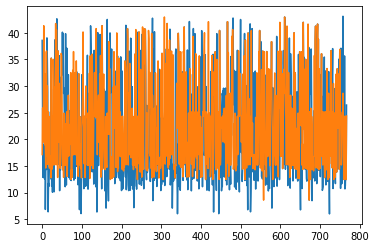

In [21]:
    
if __name__ == '__main__':
    data = pd.read_excel("ENB2012_data.xlsx")
    data = data.sample(frac=1)
    data = data.values
    X, Y = data[: ,0: -2], data[:, -2]
    #plt.plot(X[:,0])
    #plt.show()
    #print(X)

    #train the model
    model = CARTRegression()
    model.fit(X, Y)
    
    #test
    prediction = model.predict(X)
    #print(prediction)
    res = [Y[i]-prediction[i] for i in range(len(prediction))]
    plt.plot(Y)
    plt.plot(prediction)
    plt.show()